In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


In [49]:
import matplotlib.pyplot as plt       
import seaborn as sns                  
import pandas as pd                   
import numpy as np                   
from sklearn import preprocessing
from collections import Counter 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report) 
from sklearn.preprocessing import LabelEncoder 

In [50]:
df=pd.read_csv("//kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")

# Data Visualisations

In [51]:
df_visuali= df.copy()

In [52]:
df_visuali.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [53]:
df.shape

(614, 13)

In [54]:
for col in df_visuali.columns:
    print(f"\n🔹 Column: {col}")
    print(df_visuali[col].value_counts(dropna=False))  # dropna=False shows NaN counts too
    print("-" * 40)


🔹 Column: Loan_ID
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
----------------------------------------

🔹 Column: Gender
Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64
----------------------------------------

🔹 Column: Married
Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64
----------------------------------------

🔹 Column: Dependents
Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64
----------------------------------------

🔹 Column: Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
----------------------------------------

🔹 Column: Self_Employed
Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64
----------------------------------------

🔹 Column: ApplicantIncome
ApplicantIncome
250

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [55]:
credit_history_map = {0.0: 'Bad Credit History',1.0: 'Good Credit History'}
df_visuali['Credit_History'] = df_visuali['Credit_History'].map(credit_history_map)
loan_status_map = {'Y': 'Yes','N': 'No'}
df_visuali['Loan_Status'] = df_visuali['Loan_Status'].map(loan_status_map)

In [56]:
df_visuali.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Good Credit History,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Good Credit History,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Good Credit History,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Good Credit History,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Good Credit History,Urban,Yes


In [57]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [58]:
loan_status_counts = df_visuali['Loan_Status'].value_counts()

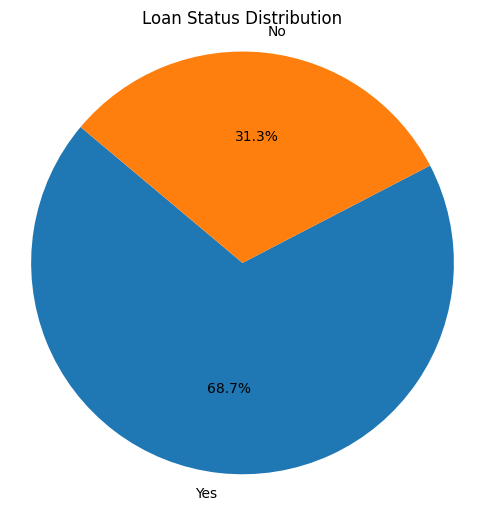

In [59]:
plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

** Histograms for Applicant and Coapplicant Income**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


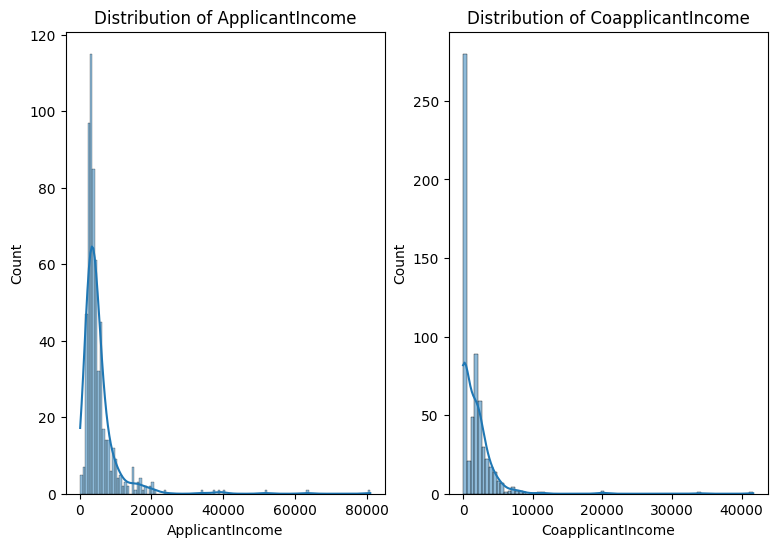

In [60]:
plt.figure(figsize=(14, 6))
for i, column in enumerate(['ApplicantIncome', 'CoapplicantIncome']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_visuali[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.show()

**Histograms for Loan Amount and Loan term**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


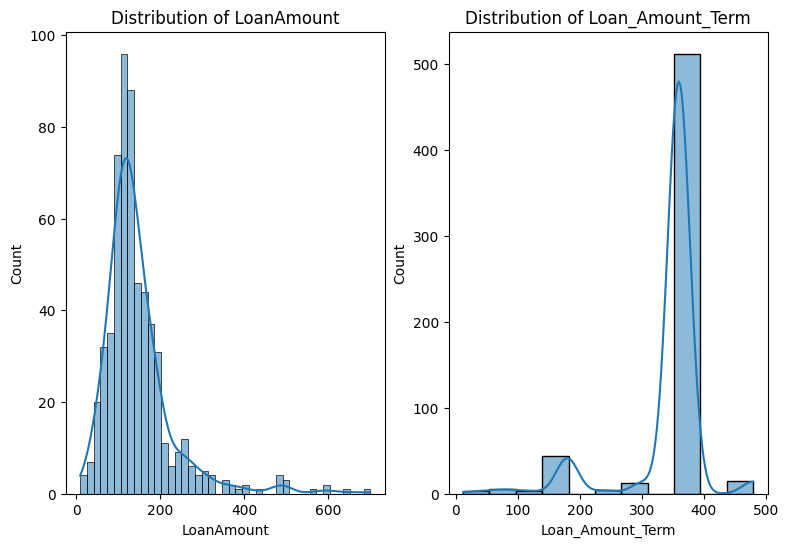

In [61]:
plt.figure(figsize=(14, 6))
for i, column in enumerate(['LoanAmount', 'Loan_Amount_Term']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_visuali[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.show()

**Loan Status and Gender**

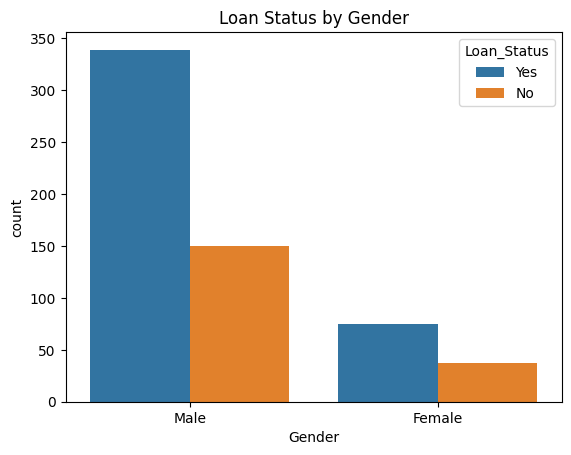

In [62]:
sns.countplot(data=df_visuali, x='Gender', hue='Loan_Status')
plt.title("Loan Status by Gender")
plt.show()


**Loan Status and Education****

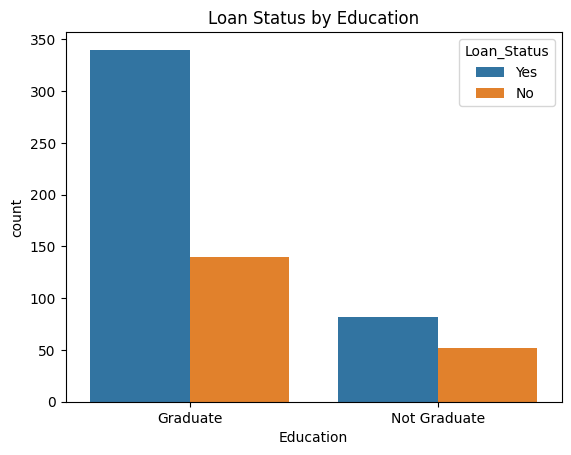

In [63]:
sns.countplot(data=df_visuali, x='Education', hue='Loan_Status')
plt.title("Loan Status by Education")
plt.show()

**Loan Status and Credit History**

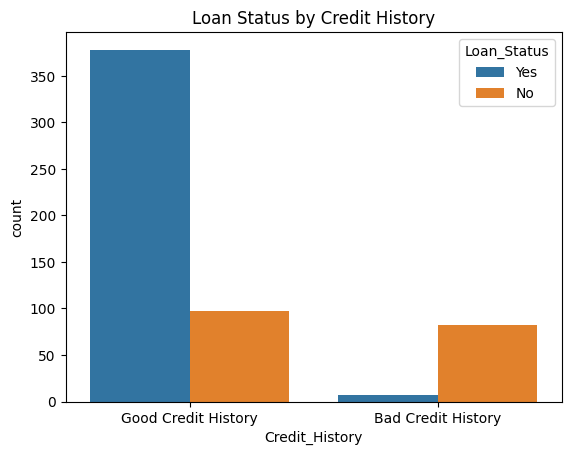

In [64]:
sns.countplot(data=df_visuali, x='Credit_History', hue='Loan_Status')
plt.title("Loan Status by Credit History")
plt.show()

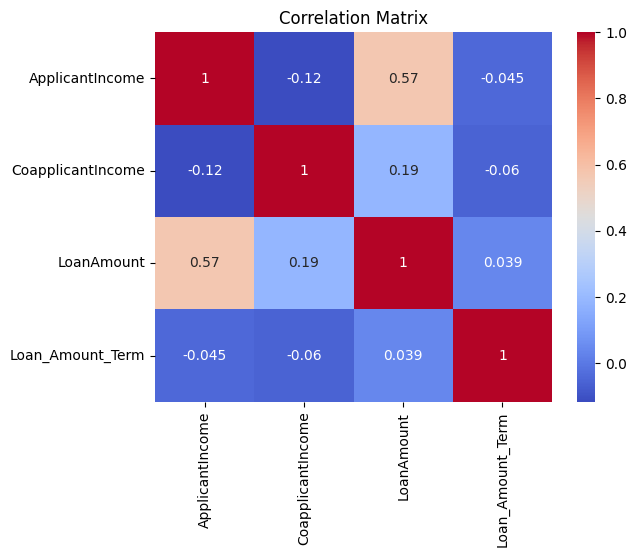

In [65]:
correlation_matrix = df_visuali.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [66]:
df_visuali.describe()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


# Data Preprocessing

In [67]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
df = df.drop('Loan_ID', axis=1)

In [69]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [70]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [73]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [74]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [75]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [76]:
loan_status_count = df['Loan_Status'].value_counts()
print(loan_status_count)

Loan_Status
1    422
0    192
Name: count, dtype: int64


In [77]:
X = df.iloc[:, :-1].values 
y = df.iloc[:,-1].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
pip install scikit-learn==1.4.2 imbalanced-learn==0.12.3


Note: you may need to restart the kernel to use updated packages.


In [80]:
from imblearn.over_sampling import SMOTE 

In [81]:
oversample = SMOTE()


In [82]:
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train) 

In [83]:
count = Counter(y_train_sm)
count

Counter({0: 342, 1: 342})

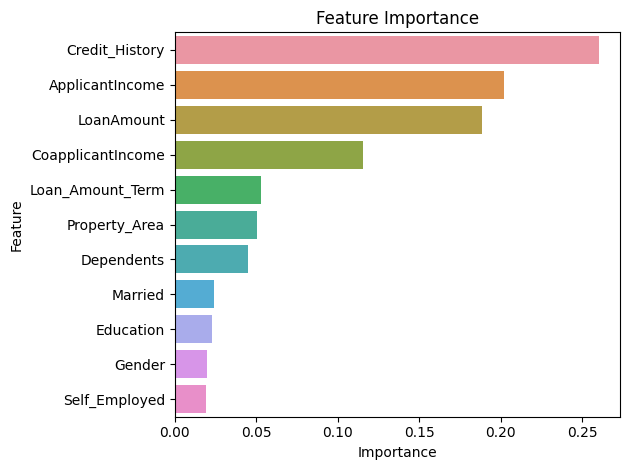

In [84]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_

# Use original column names
feature_names = df.drop('Loan_Status', axis=1).columns

# Create and sort DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [85]:
model = RandomForestClassifier()
model.fit(X_train_sm, y_train_sm)

# Generate cross-validated predictions
y_pred_cv = cross_val_predict(model, X_train_sm, y_train_sm, cv=5, method='predict')

# Probabilities for AUC
y_proba_cv = cross_val_predict(model, X_train_sm, y_train_sm, cv=5, method='predict_proba')[:, 1]

# === Map class labels 0 -> 'No', 1 -> 'Yes' ===
label_map = {0: 'No', 1: 'Yes'}
y_true_named = pd.Series(y_train_sm).map(label_map)
y_pred_named = pd.Series(y_pred_cv).map(label_map)

# Confusion matrix
cm = confusion_matrix(y_true_named, y_pred_named)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_true_named, y_pred_named)
print("Accuracy:", acc)

# Precision
precision = precision_score(y_true_named, y_pred_named, pos_label='Yes')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_named, y_pred_named, pos_label='Yes')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_true_named, y_pred_named, pos_label='Yes')
print("F1 Score:", f1)

# AUC Score
auc = roc_auc_score(y_train_sm, y_proba_cv)
print("AUC Score:", auc)

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_true_named, y_pred_named))

Confusion Matrix:
 [[266  76]
 [ 24 318]]
Accuracy: 0.8538011695906432
Precision: 0.8071065989847716
Recall: 0.9298245614035088
F1 Score: 0.8641304347826086
AUC Score: 0.8959380664135973

Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.78      0.84       342
         Yes       0.81      0.93      0.86       342

    accuracy                           0.85       684
   macro avg       0.86      0.85      0.85       684
weighted avg       0.86      0.85      0.85       684



In [86]:
low_importance_features = ['Self_Employed', 'Gender', 'Education']
df_reduced = df.drop(columns=low_importance_features)

df_reduced.head()

loan_status_count = df_reduced['Loan_Status'].value_counts()
print(loan_status_count)

X = df_reduced.iloc[:, :-1].values    # predictor attributes
y = df_reduced.iloc[:,-1].values     # target attribute

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train) # using smote

# Check the value counts
count = Counter(y_train_sm)
count

# Fitting the RF Model to the balanced and scaled data after feature selection
model = RandomForestClassifier()
model.fit(X_train_sm, y_train_sm)

# Generate cross-validated predictions
y_pred_cv = cross_val_predict(model, X_train_sm, y_train_sm, cv=5, method='predict')

# Probabilities for AUC
y_proba_cv = cross_val_predict(model, X_train_sm, y_train_sm, cv=5, method='predict_proba')[:, 1]

# === Map class labels 0 -> 'No', 1 -> 'Yes' ===
label_map = {0: 'No', 1: 'Yes'}
y_true_named = pd.Series(y_train_sm).map(label_map)
y_pred_named = pd.Series(y_pred_cv).map(label_map)

# Confusion matrix
cm = confusion_matrix(y_true_named, y_pred_named)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_true_named, y_pred_named)
print("Accuracy:", acc)

# Precision
precision = precision_score(y_true_named, y_pred_named, pos_label='Yes')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_named, y_pred_named, pos_label='Yes')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_true_named, y_pred_named, pos_label='Yes')
print("F1 Score:", f1)

# AUC Score
auc = roc_auc_score(y_train_sm, y_proba_cv)
print("AUC Score:", auc)

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_true_named, y_pred_named))

Loan_Status
1    422
0    192
Name: count, dtype: int64
Confusion Matrix:
 [[278  64]
 [ 28 314]]
Accuracy: 0.8654970760233918
Precision: 0.8306878306878307
Recall: 0.9181286549707602
F1 Score: 0.8722222222222222
AUC Score: 0.9090061899387846

Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.81      0.86       342
         Yes       0.83      0.92      0.87       342

    accuracy                           0.87       684
   macro avg       0.87      0.87      0.87       684
weighted avg       0.87      0.87      0.87       684



In [87]:
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Varying depth levels for different levels of complexity
    'n_estimators': [50, 100, 150],     # Number of trees in the forest
    'min_samples_split': [2, 10, 20],    # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],    # Max number of features considered for splitting
    'bootstrap': [True, False]           # Whether bootstrap samples are used when building trees
}

# Creating the model
rf = RandomForestClassifier(random_state=42)

# Set up grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf,            # The base model: RandomForestClassifier
    param_grid=param_grid,   # Dictionary of hyperparameter(s) to test
    cv=5,                    # 5-fold cross-validation to evaluate each setting
    scoring='f1',            # Use f1 score to evaluate model performance
    n_jobs=-1,               # Use all available CPU cores for faster computation
    verbose=1                # Show progress of the grid search in the console
)

# Fitting the grid search to the data
grid_search.fit(X_train_sm, y_train_sm)

# Getting the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Training the final model with best parameters

final_model = RandomForestClassifier(
    bootstrap=False,          # No bootstrapping
    max_depth=10,             # Max depth of the trees
    max_features='sqrt',      # Max features considered for splitting
    min_samples_leaf=4,       # Minimum samples at leaf nodes
    min_samples_split=2,      # Minimum samples to split an internal node
    n_estimators=150,         # Number of trees in the forest
    random_state=42           # Ensuring reproducibility
)

# Fit the model to the balanced and scaled training data
final_model.fit(X_train_sm, y_train_sm)

# Generate cross-validated predictions
y_pred_cv = cross_val_predict(final_model, X_train_sm, y_train_sm, cv=5, method='predict')

# Probabilities for AUC
y_proba_cv = cross_val_predict(final_model, X_train_sm, y_train_sm, cv=5, method='predict_proba')[:, 1]

# === Map class labels 0 -> 'No', 1 -> 'Yes' ===
label_map = {0: 'No', 1: 'Yes'}
y_true_named = pd.Series(y_train_sm).map(label_map)
y_pred_named = pd.Series(y_pred_cv).map(label_map)

# Confusion matrix
cm = confusion_matrix(y_true_named, y_pred_named)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_true_named, y_pred_named)
print("Accuracy:", acc)

# Precision
precision = precision_score(y_true_named, y_pred_named, pos_label='Yes')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_named, y_pred_named, pos_label='Yes')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_true_named, y_pred_named, pos_label='Yes')
print("F1 Score:", f1)

# AUC Score
auc = roc_auc_score(y_train_sm, y_proba_cv)
print("AUC Score:", auc)

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_true_named, y_pred_named))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.8807688204193036
Confusion Matrix:
 [[258  84]
 [ 15 327]]
Accuracy: 0.8552631578947368
Precision: 0.7956204379562044
Recall: 0.956140350877193
F1 Score: 0.8685258964143426
AUC Score: 0.9075313771758832

Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.75      0.84       342
         Yes       0.80      0.96      0.87       342

    accuracy                           0.86       684
   macro avg       0.87      0.86      0.85       684
weighted avg       0.87      0.86      0.85       684



In [88]:
xgb_model = XGBClassifier(
    eval_metric='logloss',   # Recommended for binary classification
    random_state=42
)

xgb_model.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

from sklearn.model_selection import cross_val_predict

# Generate cross-validated predictions (label predictions)
y_pred_cv_xgb = cross_val_predict(xgb_model, X_train_sm, y_train_sm, cv=5, method='predict')

# Probabilities for AUC (probability of class 1 — 'Yes')
y_proba_cv_xgb = cross_val_predict(xgb_model, X_train_sm, y_train_sm, cv=5, method='predict_proba')[:, 1]

# Map class labels 0 -> 'No', 1 -> 'Yes'
label_map = {0: 'No', 1: 'Yes'}
y_true_named = pd.Series(y_train_sm).map(label_map)
y_pred_named_xgb = pd.Series(y_pred_cv_xgb).map(label_map)

# Confusion matrix
cm_xgb = confusion_matrix(y_true_named, y_pred_named_xgb)
print("Confusion Matrix:\n", cm_xgb)

# Accuracy
acc_xgb = accuracy_score(y_true_named, y_pred_named_xgb)
print("Accuracy:", acc_xgb)

# Precision
precision_xgb = precision_score(y_true_named, y_pred_named_xgb, pos_label='Yes')
print("Precision:", precision_xgb)

# Recall
recall_xgb = recall_score(y_true_named, y_pred_named_xgb, pos_label='Yes')
print("Recall:", recall_xgb)

# F1 Score
f1_xgb = f1_score(y_true_named, y_pred_named_xgb, pos_label='Yes')
print("F1 Score:", f1_xgb)

# AUC Score
auc_xgb = roc_auc_score(y_train_sm, y_proba_cv_xgb)
print("AUC Score:", auc_xgb)

# Classification Report
print("\nClassification Report:\n", classification_report(y_true_named, y_pred_named_xgb))

Confusion Matrix:
 [[271  71]
 [ 37 305]]
Accuracy: 0.8421052631578947
Precision: 0.8111702127659575
Recall: 0.8918128654970761
F1 Score: 0.8495821727019499
AUC Score: 0.9001316644437606

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.79      0.83       342
         Yes       0.81      0.89      0.85       342

    accuracy                           0.84       684
   macro avg       0.85      0.84      0.84       684
weighted avg       0.85      0.84      0.84       684



In [89]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_sm, y_train_sm)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_

# Generate cross-validated predictions
y_pred_cv = cross_val_predict(best_xgb_model, X_train_sm, y_train_sm, cv=5, method='predict')

# Probabilities for AUC
y_proba_cv = cross_val_predict(best_xgb_model, X_train_sm, y_train_sm, cv=5, method='predict_proba')[:, 1]

# Map class labels
label_map = {0: 'No', 1: 'Yes'}
y_true_named = pd.Series(y_train_sm).map(label_map)
y_pred_named = pd.Series(y_pred_cv).map(label_map)

# Confusion matrix
cm = confusion_matrix(y_true_named, y_pred_named)
print("Confusion Matrix:\n", cm)

# Accuracy
print("Accuracy:", accuracy_score(y_true_named, y_pred_named))

# Precision
print("Precision:", precision_score(y_true_named, y_pred_named, pos_label='Yes'))

# Recall
print("Recall:", recall_score(y_true_named, y_pred_named, pos_label='Yes'))

# F1 Score
print("F1 Score:", f1_score(y_true_named, y_pred_named, pos_label='Yes'))

# AUC Score
print("AUC Score:", roc_auc_score(y_train_sm, y_proba_cv))

# Full report
print("\nClassification Report:\n", classification_report(y_true_named, y_pred_named))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
Best F1 Score: 0.8718278114020007
Confusion Matrix:
 [[250  92]
 [ 12 330]]
Accuracy: 0.847953216374269
Precision: 0.7819905213270142
Recall: 0.9649122807017544
F1 Score: 0.8638743455497382
AUC Score: 0.8877560616941965

Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.73      0.83       342
         Yes       0.78      0.96      0.86       342

    accuracy                           0.85       684
   macro avg       0.87      0.85      0.85       684
weighted avg       0.87      0.85      0.85       684



In [90]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base learners
estimators = [
    ('rf', final_model),  # already tuned
    ('xgb', best_xgb_model)  # already tuned
]

# Meta-learner (final estimator)
meta_learner = LogisticRegression()

# Stacking classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

# Cross-validated predictions
y_pred_cv_stack = cross_val_predict(stacking_model, X_train_sm, y_train_sm, cv=5, method='predict')

# Probabilities for AUC
y_proba_cv_stack = cross_val_predict(stacking_model, X_train_sm, y_train_sm, cv=5, method='predict_proba')[:, 1]

# Map labels
label_map = {0: 'No', 1: 'Yes'}
y_true_named = pd.Series(y_train_sm).map(label_map)
y_pred_named_stack = pd.Series(y_pred_cv_stack).map(label_map)

# Metrics
cm_stack = confusion_matrix(y_true_named, y_pred_named_stack)
print("Confusion Matrix:\n", cm_stack)

acc_stack = accuracy_score(y_true_named, y_pred_named_stack)
print("Accuracy:", acc_stack)

precision_stack = precision_score(y_true_named, y_pred_named_stack, pos_label='Yes')
print("Precision:", precision_stack)

recall_stack = recall_score(y_true_named, y_pred_named_stack, pos_label='Yes')
print("Recall:", recall_stack)

f1_stack = f1_score(y_true_named, y_pred_named_stack, pos_label='Yes')
print("F1 Score:", f1_stack)

auc_stack = roc_auc_score(y_train_sm, y_proba_cv_stack)
print("AUC Score:", auc_stack)

print("\nClassification Report:\n", classification_report(y_true_named, y_pred_named_stack))

Confusion Matrix:
 [[259  83]
 [ 17 325]]
Accuracy: 0.8538011695906432
Precision: 0.7965686274509803
Recall: 0.9502923976608187
F1 Score: 0.8666666666666667
AUC Score: 0.9016535002222906

Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.76      0.84       342
         Yes       0.80      0.95      0.87       342

    accuracy                           0.85       684
   macro avg       0.87      0.85      0.85       684
weighted avg       0.87      0.85      0.85       684



In [91]:
from sklearn.ensemble import VotingClassifier

# Build the voting ensemble
ensemble_model = VotingClassifier(
    estimators=[('rf', final_model), ('xgb', xgb_model)],
    voting='soft'
)

# Fit the ensemble model
ensemble_model.fit(X_train_sm, y_train_sm)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

# Generate cross-validated predictions (label predictions)
y_pred_cv_ens = cross_val_predict(ensemble_model, X_train_sm, y_train_sm, cv=5, method='predict')

# Probabilities for AUC (probability of class 1 — 'Yes')
y_proba_cv_ens = cross_val_predict(ensemble_model, X_train_sm, y_train_sm, cv=5, method='predict_proba')[:, 1]

# Map class labels 0 -> 'No', 1 -> 'Yes'
label_map = {0: 'No', 1: 'Yes'}
y_true_named = pd.Series(y_train_sm).map(label_map)
y_pred_named_ens = pd.Series(y_pred_cv_ens).map(label_map)

# Confusion matrix
cm_ens = confusion_matrix(y_true_named, y_pred_named_ens)
print("Confusion Matrix:\n", cm_ens)

# Accuracy
acc_ens = accuracy_score(y_true_named, y_pred_named_ens)
print("Accuracy:", acc_ens)

# Precision
precision_ens = precision_score(y_true_named, y_pred_named_ens, pos_label='Yes')
print("Precision:", precision_ens)

# Recall
recall_ens = recall_score(y_true_named, y_pred_named_ens, pos_label='Yes')
print("Recall:", recall_ens)

# F1 Score
f1_ens = f1_score(y_true_named, y_pred_named_ens, pos_label='Yes')
print("F1 Score:", f1_ens)

# AUC Score
auc_ens = roc_auc_score(y_train_sm, y_proba_cv_ens)
print("AUC Score:", auc_ens)

# Classification Report
print("\nClassification Report:\n", classification_report(y_true_named, y_pred_named_ens))

Confusion Matrix:
 [[268  74]
 [ 30 312]]
Accuracy: 0.847953216374269
Precision: 0.8082901554404145
Recall: 0.9122807017543859
F1 Score: 0.8571428571428571
AUC Score: 0.9064754967340378

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.78      0.84       342
         Yes       0.81      0.91      0.86       342

    accuracy                           0.85       684
   macro avg       0.85      0.85      0.85       684
weighted avg       0.85      0.85      0.85       684



In [92]:
!pip install lime



In [93]:
from lime import lime_tabular

from lime.lime_tabular import LimeTabularExplainer


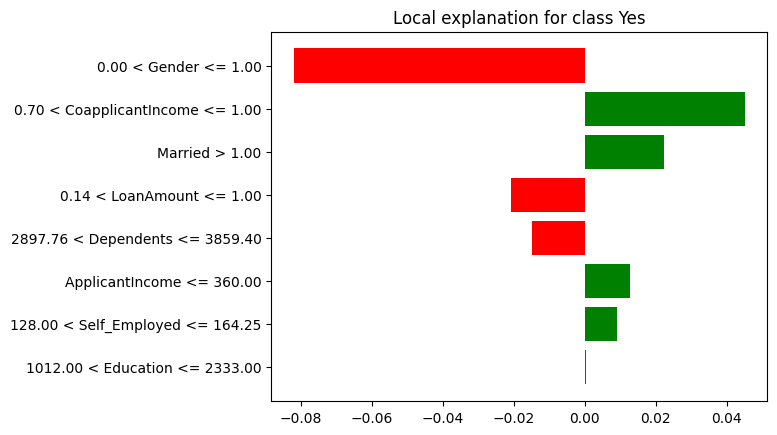

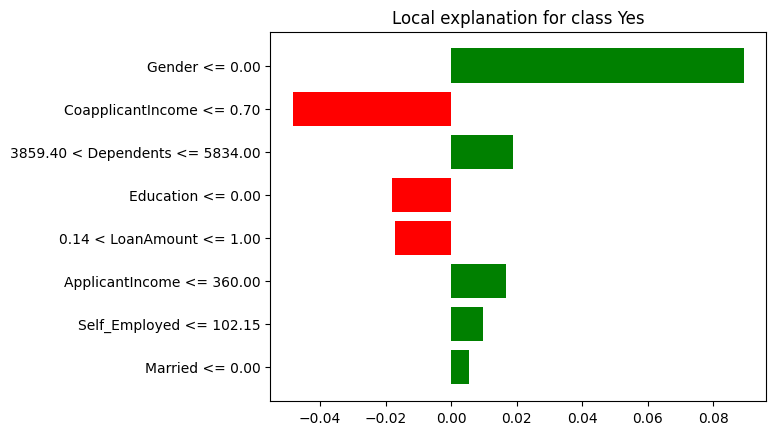

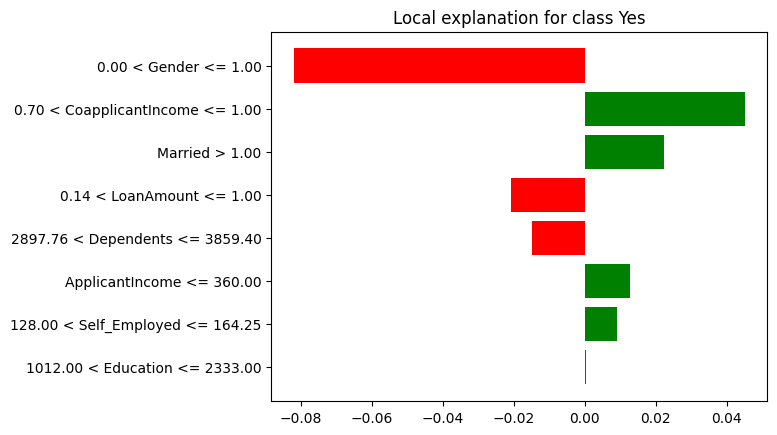

In [94]:
feature_names = df.drop('Loan_Status', axis=1).columns.tolist()

explainer = LimeTabularExplainer(
    training_data=X_train_sm,
    feature_names=feature_names,
    class_names=['No', 'Yes'],
    mode='classification',
    discretize_continuous=True
)

#Choose an instance to explain
i = 4  # for example
instance = X_train_sm[i]

explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=final_model.predict_proba,
    num_features=10
)
explanation.show_in_notebook()

explanation.as_pyplot_figure()

#Choose an instance to explain
i = 6  # for example
instance = X_train_sm[i]

explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=final_model.predict_proba,
    num_features=10
)
explanation.show_in_notebook()

explanation.as_pyplot_figure()